<b>Loading relevant libraries</b>

In [123]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Dropout,Flatten
from keras.preprocessing import image

<b>Loading the data</b>

In [124]:
(x_train,y_train),(x_test,y_test)=cifar10.load_data()

<b>The 10-classes</b>

In [125]:
class_labels=["Plane","Car","Bird","Cat","Deer","Dog","Frog","Horse","Boat","Truck"]

<b>Preprocessing the images</b>

In [126]:
x_train=x_train.astype("float32")
x_test=x_test.astype("float32")
x_train=x_train/255
x_test=x_test/255

<b>Converting the classes into categorical variable</b>

In [127]:
y_train=keras.utils.to_categorical(y_train,10)
y_test=keras.utils.to_categorical(y_test,10)

<b>Defining the model</b>

In [128]:
model=Sequential()
model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(32,32,3)))   # 32 filter of size 3*3
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))      # max pooling with window size of 2*2
model.add(Dropout(0.4))   # To avoid overfitting
model.add(Conv2D(63,(3,3),padding='same',activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))  # To avoid overfitting
model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dense(10,activation='softmax'))   # Used 'softmax' activation to get the percentage probability for each class
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 63)        18207     
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 13, 13, 64)        36352     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 6, 6, 64)         

<b>Model compilation</b>

In [129]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

<b>Training the model</b>

In [130]:
model.fit(x_train, y_train, batch_size=64, epochs=5, validation_data=(x_test,y_test))

Train on 50000 samples, validate on 10000 samples
Epoch 1/5
50000/50000 [==============================] - 89s 2ms/step - loss: 1.5129 - accuracy: 0.4498 - val_loss: 1.1771 - val_accuracy: 0.5846
Epoch 2/5
50000/50000 [==============================] - 90s 2ms/step - loss: 1.1184 - accuracy: 0.6048 - val_loss: 0.9331 - val_accuracy: 0.6703
Epoch 3/5
50000/50000 [==============================] - 89s 2ms/step - loss: 0.9585 - accuracy: 0.6613 - val_loss: 0.9400 - val_accuracy: 0.6678
Epoch 4/5
50000/50000 [==============================] - 89s 2ms/step - loss: 0.8558 - accuracy: 0.6983 - val_loss: 0.8126 - val_accuracy: 0.7153
Epoch 5/5
50000/50000 [==============================] - 91s 2ms/step - loss: 0.7690 - accuracy: 0.7281 - val_loss: 0.7626 - val_accuracy: 0.7380


<b>Visualizing the horse image before checking its prediction</b>

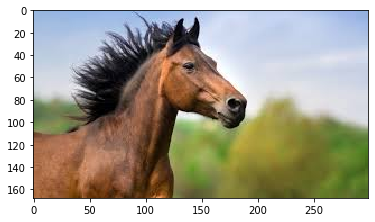

In [131]:
pic=image.load_img(r"C:\Users\Ankit\Desktop\horse.jpg")
plt.imshow(pic)

<b>Prediction </b>

In [132]:
img=image.load_img(r"C:\Users\Ankit\Desktop\horse.jpg",target_size=(32,32))
img=image.img_to_array(img)
list_of_img=np.expand_dims(img,axis=0)
result=model.predict(list_of_img)
most_likely_class_index=int(np.argmax(single_result))
class_likelihood=single_result[most_likely_class_index]
class_label=class_labels[most_likely_class_index]

In [133]:
print(class_label)

Horse
